# **Classificando Dígitos com MLPs**

---

Vamos utilizar um modelo **MLP** para realizar a classificação de imagens que possuem dígitos de $0$ a $9$. Para o teste utilizaremos o dataset [digits](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html) da biblioteca **Scikit-Learn**. Esse dataset é composto por imagens **8x8** em tons de cinza, cada uma com sua label correspondente a um dígito de $0$ a $9$.

## **01 - Importando as Bibliotecas e Carregando o Dataset**

---

Utilizamos o módulo `datasets` do **Scikit-Learn** para carregar os dados a partir da função `load_digits(return_X_y=True)`. Passamos o parâmetro `return_X_y` como `True` para que a função retorne os exemplos e as anotações em variáveis separadas, atribuimos o resultado na variáveis `images` e `target`, respectivamente.

In [ ]:
import matplotlib.pyplot as plt

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

import numpy as np
import cv2

images, target = datasets.load_digits(return_X_y=True)

In [ ]:
## 1.1 - Verifique as dimensões das variáveis images e target
## Substitua as linhas abaixo para retornar o resultado

shape_images = images.shape
shape_target = target.shape

print(shape_images)
print(shape_target)

(1797, 64)
(1797,)


In [ ]:
## 1.2 - Quantos exemplos possui o dataset digits?
dataset_size = shape_images[0]

print(dataset_size)

1797


## **02 - Visualizando os Exemplos**

---

Utilizando a biblioteca `matplotlib`, vamos tentar visualizar alguns dos dados disponíveis no dataset.

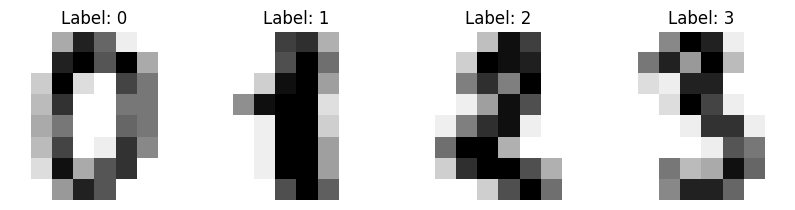

In [ ]:
figures, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, images, target):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Label: {prediction}")

## **03 - Separando as Partições**

---

Utilize a função `train_test_split` do `sklearn` para separar as partições em um conjunto de treino e outro de teste. Utilizaremos o conjunto de treino para ajustar o modelo e o conjunto de teste para avaliar o desempenho do nosso modelo.

Utilize a função de forma que o conjunto de treino possua **70%** dos dados e o conjunto de teste possua **30%**.

Referência: [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split)

In [ ]:
X_train, X_test = None, None
y_train, y_test = None, None

# 3.1 Utilize a função train_test_split para obter as partições
# Atribua o resultado nas variáveis acima

X_train, X_test, y_train, y_test = train_test_split(images,
                                                    target,
                                                    test_size=0.3,
                                                    random_state=42
                                                   )

# 3.2 Compute o tamanho de cada partição, atribuindo o valor nas variáveis abaixo
train_size = X_train.shape[0]
test_size  = X_test.shape[0]

print(train_size, test_size)

1257 540


## **04 - Inicializando e Treinando o Modelo**

---

Vamos carregar e treinar o modelo utilizando os dados da partição de treino.

Vamos utilizar a classe [`MLPClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier) do `sklearn` para instanciar a nossa rede.

Crie um modelo que contenha $3$ camadas escondidas de dimensão $(50, 20, 10)$ utilizando a função de ativação `relu`, otimizador `adam`, taxa de aprendizado igual a $0.001$ e o número máximo de iterações igual a $300$.

In [ ]:
# 4.1 - Inicialize o modelo instanciando o classificador com o sklearn e o atribua a variável network

network = MLPClassifier(hidden_layer_sizes=(50,20,10),
                        activation='relu',
                        solver='adam',
                        learning_rate_init=0.001,
                        max_iter=300
                       )

print(network.activation,
      network.solver,
      network.learning_rate_init,
      network.hidden_layer_sizes
     )

relu adam 0.001 (50, 20, 10)


In [ ]:
# 4.2 - Utilize a função fit para realizar o treinamento com as partições X_train e y_train

network.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50, 20, 10), max_iter=300)

## **05 - Avaliando o Resultado**

---

Utilize a função `predict` da biblioteca `sklearn`, para realizar as previsões com o conjunto `X_test`

In [ ]:
# 5.1 - Utilize a função predict a partir do modelo treinado

predictions = network.predict(X_test)

print(f"Classification report for classifier {network}:\n",
      f"{metrics.classification_report(y_test, predictions)}"
     )

Classification report for classifier MLPClassifier(hidden_layer_sizes=(50, 20, 10), max_iter=300):
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        53
           1       0.94      0.92      0.93        50
           2       0.92      0.98      0.95        47
           3       0.98      0.94      0.96        54
           4       0.95      1.00      0.98        60
           5       0.94      0.94      0.94        66
           6       0.95      0.98      0.96        53
           7       1.00      0.98      0.99        55
           8       0.88      0.88      0.88        43
           9       0.95      0.92      0.93        59

    accuracy                           0.95       540
   macro avg       0.95      0.95      0.95       540
weighted avg       0.95      0.95      0.95       540



Podemos verificar os parâmetros da rede a partir do atributo `coefs_`. Da mesma forma, podemos acessar o valor de bias de cada neurônio acessando o atributo `intercepts_`.

Acesse os atributos `coefs_` e `intercepts_` da rede para verificar a dimensão dos conjuntos de pesos da rede criada. Utilize esses valores para calcular o numero de parâmetros treináveis que a nossa rede possui.

In [ ]:
weights = network.coefs_
bias    = network.intercepts_

# 5.2 - Compute o número de parâmetros e substitua o valor da variável abaixo com o número de parâmetros do modelo

parameters_number = 0

for w, b in zip(weights, bias):
    parameters_number += np.prod(w.shape)
    parameters_number += np.prod(b.shape)

print(parameters_number)

4590


## **06 - Testando em um Dataset Externo**

---

Treinamos e testamos nosso modelo em um único dataset. Na prática, vamos querer aplicar o nosso modelo em diferentes conjuntos de dados. Para simular esse caso, vamos carregar algumas imagens do dataset **MNIST** o qual pode ser acessado pelo **PyTorch**, utlizando o módulo `datasets.MNIST`. O **MNIST** também é um dataset para classificação de dígitos, porém, o dataset é composto por imagens em tons de cinza de dimensão **28x28** com rótulos entre $0$ e $9$.

As células a seguir são utilizadas para baixar a partição de teste do dataset localmente, carregar os exemplos utilizando a classe `DataLoader` do **PyTorch**. Podemos manipular o `DataLoader` como um objeto do tipo `iterator`, dessa forma, podemos obter os exemplos utilizando a função `next()` do **Python**; ou qualquer outra função compativel com `iterators`. Utilizamos o `batch_size` igual a $10$, o que significa que para cada iteração do `DataLoader` obtemos $10$ imagens do conjunto de teste.

As imagens e labels são retornadas ao final do processo utilizando as variáveis `mnist_images` e `mnist_label`.

In [ ]:
import torch
from torch.utils import data
from torchvision import transforms, datasets

transform = transforms.ToTensor()

test_ds = datasets.MNIST(root = ".", train = False,
                         download = True, transform = transform)

test_dl = data.DataLoader(
    test_ds, batch_size=10, shuffle=True,
    num_workers=2, pin_memory=True
)

mnist_test_images, mnist_test_labels = next(iter(test_dl))

mnist_test_images  = mnist_test_images.numpy()
mnist_test_labels  = mnist_test_labels.numpy()

Imprimindo a dimensão das imagens, podemos perceber que a representação utilizada pelo **PyTorch** não corresponde a utilizada pelo nosso modelo.

O **PyTorch** representa os exemplos do `mnist` como $(B, C, H, W)$, onde $B$ é o número de imagens, $C$ é o número de canais, $H$ é a altura da imagem e $W$ corresponde a largura da imagem.

In [ ]:
print(mnist_test_images.shape)

(10, 1, 28, 28)


Para utilizar essas imagens no nosso modelo, precisamos redimensionar os dados para **8x8**. Em seguida, devemos converter essa entrada para um vetor de dimensão $(B, 64)$, transformando nossa imagem **8x8** em um vetor unidimensional.

Utilize a função [`resize`](https://learnopencv.com/image-resizing-with-opencv/) do **OpenCV** para redimensionar os nossos exemplos e em seguida aplique as funções da biblioteca **NumPy** para obter o vetor nas dimensões esperada pelo modelo.

***Dica 01:*** *Temos um conjunto de $B$ imagens na variável `mnist_test_images`, itere sobre a variável e realize as operações para cada imagem individualmente.*

***Dica 02:*** *Remova a dimensão $1$ que representa $C$ antes do resize. O **OpenCV** utiliza a representação $(H, W, C)$ - altura, largura, canais. Podendo omitir o valor dos canais quando $C = 1$ (i.e., $(H, W)$). Utilize o [`numpy.squeeze`](https://numpy.org/doc/stable/reference/generated/numpy.squeeze.html).*

***Dica 03:*** *Para transformar a imagem em um vetor unidimensional utilize as funções `flatten` ou `reshape` do NumPy.*

In [ ]:
squeezed_images = None

# 6.1 - Remova a dimensão extra que representa o número de canais

squeezed_images = np.squeeze(mnist_test_images, axis=1)

print(squeezed_images.shape)

(10, 28, 28)


In [ ]:
resized_images = None

# 6.2 - Redimensione as imagens para o tamanho 8x8

resized_images = np.array([cv2.resize(img, (8,8)) for img in squeezed_images])

print(resized_images.shape)

(10, 8, 8)


In [ ]:
mnist_transformed = None

#6.3 - Transforme as imagens 8x8 em vetores de tamanho 64

mnist_transformed = np.array([img.flatten() for img in resized_images])

print(mnist_transformed.shape)

(10, 64)


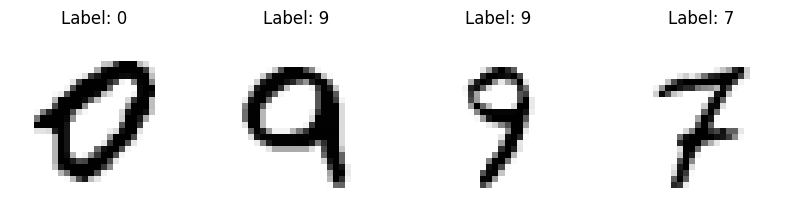

In [ ]:
# Visualizando as imagens 28x28 antes da transformação

figures, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, squeezed_images, mnist_test_labels):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Label: {label}")

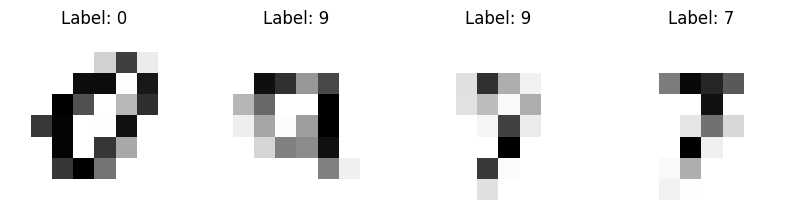

In [ ]:
# Visualizando as imagens 8x8

figures, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, mnist_transformed, mnist_test_labels):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Label: {label}")

Vamos passar agora nossas imagens transformadas para que o modelo realize as predições.

Utilize a função `predict` para obter os resultados a partir da variável `network`, utilizando como parâmetro nossa variável `mnist_transformed`

In [ ]:
# 6.5 - Utilize a função predict a partir do modelo treinado

predictions_mnist = network.predict(mnist_transformed)

print(f"Classification report for classifier {network}:\n",
      f"{metrics.classification_report(mnist_test_labels, predictions_mnist, zero_division=1)}\n"
     )

Classification report for classifier MLPClassifier(hidden_layer_sizes=(50, 20, 10), max_iter=300):
               precision    recall  f1-score   support

           0       1.00      0.00      0.00         1
           3       1.00      0.00      0.00         1
           4       0.00      1.00      0.00         0
           5       1.00      0.00      0.00         2
           6       1.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
           8       1.00      0.00      0.00         1
           9       0.40      1.00      0.57         2

    accuracy                           0.20        10
   macro avg       0.68      0.25      0.07        10
weighted avg       0.78      0.20      0.11        10





*Podemos ver que o modelo não manteve a sua acurácia.*

## **Bônus**

---

Na célula abaixo carregamos um conjunto adicional de treino do **MNIST**.
Tente treinar o mesmo modelo anterior utilizando esse novo conjunto e avalie o resultado final.

Teste o treinamento com imagens **8x8** e também com **28x28**. O resultado é alterado utilizando o mesmo modelo?

Teste diferentes tamanhos de imagens, diferentes arquiteturas e diferentes métodos de *resize* para avaliar as mudanças dos resultados.

In [ ]:
train_ds = datasets.MNIST(root = ".", train = False,
                         download = True, transform = transform)

train_dl = data.DataLoader(train_ds, batch_size=1000,
          shuffle=True, num_workers=2, pin_memory=True)

mnist_train_images, mnist_train_labels = next(iter(train_dl))

mnist_train_images = mnist_train_images.numpy()
mnist_train_labels  = mnist_train_labels.numpy()

In [ ]:
# E.1 - Transforme os dados

# Remover a dimensão extra que representa o número de canais
squeezed_train_images = np.squeeze(mnist_train_images, axis=1)

# Redimensionar as imagens
resized_train_images = np.array([cv2.resize(img, (8,8)) for img in squeezed_train_images])

# Transformar as imagens em vetores unidimensinais
mnist_train_transformed = np.array([img.flatten() for img in resized_train_images])

# E.2 - Crie e treine o modelo com o conjunto de treino

network = MLPClassifier(hidden_layer_sizes=(50,20,10),
                        activation='relu',
                        solver='adam',
                        learning_rate_init=0.001,
                        max_iter=800
                       )

network.fit(mnist_train_transformed, mnist_train_labels)

# E.3 - Avalie o resultado utilizando o conjunto de teste

# Utilizar a função predict a partir do modelo treinado

new_predictions_mnist = network.predict(mnist_transformed)

print(f"Classification report for classifier {network}:\n",
      f"{metrics.classification_report(mnist_test_labels, new_predictions_mnist, zero_division=1)}\n"
     )

Classification report for classifier MLPClassifier(hidden_layer_sizes=(50, 20, 10), max_iter=800):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         2

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10


